In [44]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [45]:
import tensorflow as tf

In [46]:
mnist=tf.keras.datasets.mnist
mnist
#modified national institute of standards and technology database
#it has a collection of greyscall images with handwritten digits
#from 0 to 9

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Dell\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [47]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Dell\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [48]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [49]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [50]:
#x_train,x_test=x_train/255.0,x_test/255.0
#1.) why to divide by 255
#when we are working with image data,the pixel values are integers in the range of [0,255].so,dividing it by 255.0scales these values to the range of[0,1]
#working with the similar values increase the stability of optimization algorithm
#tf.keras.layers.Dense(128,activation='relu')

#2.)why 128
#it is the specific number of neurons or units in the dense layer
#relu-->rectified linear unit,it helps to add
#non-linearity to our algorithm


In [51]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [52]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2953 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1458 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1099 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0776 - accuracy: 0.9753


In [53]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9781


In [54]:
print(test_loss)
print(test_accuracy)

0.07132536917924881
0.9781000018119812


In [55]:
#---->Activation function
#Relu
#It is one of the most widly used activation function,it replaces all negative values with zero,
#leaving the positive value unchanged

#Sigmod
#sigmod reduce the output between 0 and 1, making it suitable for
#binary classification problems

#Tanh(Hyperbolic Tangent):
#it reduces the output between -1 to 1

#softmax
#It is mostly used in output layer

#Leaku Relu
#It is a another varient of Relu that allows a small positive gradient for
#Negative value just to avoid dead neurons


In [56]:
#Project:1
#convert image to greyscall using CNN

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [57]:


#Load the RGB image
image_path=r"C:\Users\Dell\OneDrive\Pictures\Saved Pictures\bala godess.jpg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
print(original_array)

[[[  2. 117. 174.]
  [  5. 120. 183.]
  [  4. 120. 193.]
  ...
  [132. 207. 238.]
  [134. 209. 240.]
  [133. 208. 239.]]

 [[  5. 117. 180.]
  [  8. 121. 187.]
  [  6. 120. 191.]
  ...
  [135. 208. 240.]
  [132. 205. 237.]
  [131. 204. 236.]]

 [[  6. 115. 184.]
  [ 11. 120. 189.]
  [  6. 117. 188.]
  ...
  [135. 208. 240.]
  [130. 203. 235.]
  [132. 205. 237.]]

 ...

 [[ 28.   0.   0.]
  [ 36.   8.   5.]
  [ 41.  11.   9.]
  ...
  [ 22. 160. 225.]
  [ 32. 166. 229.]
  [ 36. 176. 235.]]

 [[ 23.   0.   0.]
  [ 31.   3.   0.]
  [ 40.  12.   9.]
  ...
  [ 23. 132. 201.]
  [ 25. 130. 196.]
  [ 26. 134. 198.]]

 [[ 27.   2.   0.]
  [ 34.   8.   7.]
  [ 40.  14.  13.]
  ...
  [  0.  72. 138.]
  [  0.  69. 134.]
  [  0.  68. 130.]]]


In [58]:
image_path=r"C:\Users\Dell\OneDrive\Pictures\Saved Pictures\bala godess.jpg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.00784314 0.45882353 0.68235296]
  [0.01960784 0.47058824 0.7176471 ]
  [0.01568628 0.47058824 0.75686276]
  ...
  [0.5176471  0.8117647  0.93333334]
  [0.5254902  0.81960785 0.9411765 ]
  [0.52156866 0.8156863  0.9372549 ]]

 [[0.01960784 0.45882353 0.7058824 ]
  [0.03137255 0.4745098  0.73333335]
  [0.02352941 0.47058824 0.7490196 ]
  ...
  [0.5294118  0.8156863  0.9411765 ]
  [0.5176471  0.8039216  0.92941177]
  [0.5137255  0.8        0.9254902 ]]

 [[0.02352941 0.4509804  0.72156864]
  [0.04313726 0.47058824 0.7411765 ]
  [0.02352941 0.45882353 0.7372549 ]
  ...
  [0.5294118  0.8156863  0.9411765 ]
  [0.50980395 0.79607844 0.92156863]
  [0.5176471  0.8039216  0.92941177]]

 ...

 [[0.10980392 0.         0.        ]
  [0.14117648 0.03137255 0.01960784]
  [0.16078432 0.04313726 0.03529412]
  ...
  [0.08627451 0.627451   0.88235295]
  [0.1254902  0.6509804  0.8980392 ]
  [0.14117648 0.6901961  0.92156863]]

 [[0.09019608 0.         0.        ]
  [0.12156863 0.01176471 0.        ]


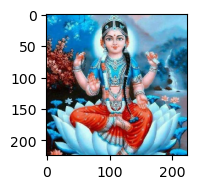

In [59]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title=("Original Image")
plt.imshow(original_array)

In [60]:
#convert image to grey scale

In [61]:
model=models.Sequential()
#Sequentials()-->It allows us to create a 
#neural network
#you can add one layer to neural network at a time and each layer has
#connection only to the previous and next layer
model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))
#Conv2d --> It represent 2D conventional layer 

#Conventional layer ---->it performs element wise operations i.e.,Addition,Multiplication,Subtraction,Division
#layers.Conv2D(1)-->1 is used to mention the number of filters in the conventional layer
#(3,3)---->set the size of filter 

#(224,224,3)---->224*224---->pixels with 3 color channel(RGB)

#model.add(layers.MaxPooling2D((2,2)))

In [62]:
model.add(layers.MaxPooling2D((2,2)))
#MaxPooling2D()-->it is used to set the dimentions of input data
#and extract important features from Conv2D layer
model.summary()
#To reshape the image 
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 1)       0         
 g2D)                                                            
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 112ms/step


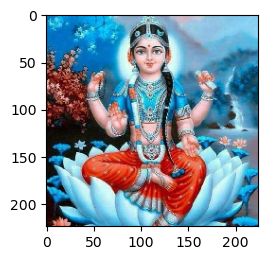

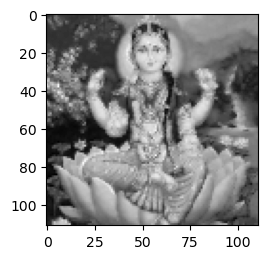

In [63]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title=("Original Image")
plt.imshow(original_array)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.title=("Original Image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\sample_submission.csv")
df

,prediction
0,sunflower
1,sunflower
2,sunflower
3,sunflower
4,sunflower
...,...
919,sunflower
920,sunflower
921,sunflower
922,sunflower


In [5]:
df1=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\Testing_set_flower.csv")
df1

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
919,Image_920.jpg
920,Image_921.jpg
921,Image_922.jpg
922,Image_923.jpg


In [2]:
#Project 2:
#Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [1]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISEY_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\daisy"
FLOWER_SUNFLOWER_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\sunflower"
FLOWER_TULIP_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\tulip"
FLOWER_DANDI_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\dandelion"
FLOWER_ROSE_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\rose"


In [7]:
def assign_label(img,flower_type):
    return flower_type

In [23]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        #label=assign_label(img,flower_type)
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [24]:
make_train_data('Daisy',FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:03<00:00, 153.83it/s]

3197


In [25]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:03<00:00, 135.50it/s]

3692


In [26]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 557/557 [00:04<00:00, 131.18it/s]

4249


In [27]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:04<00:00, 150.78it/s]

4895


In [28]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:03<00:00, 157.73it/s]

5392


In [30]:
print(X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



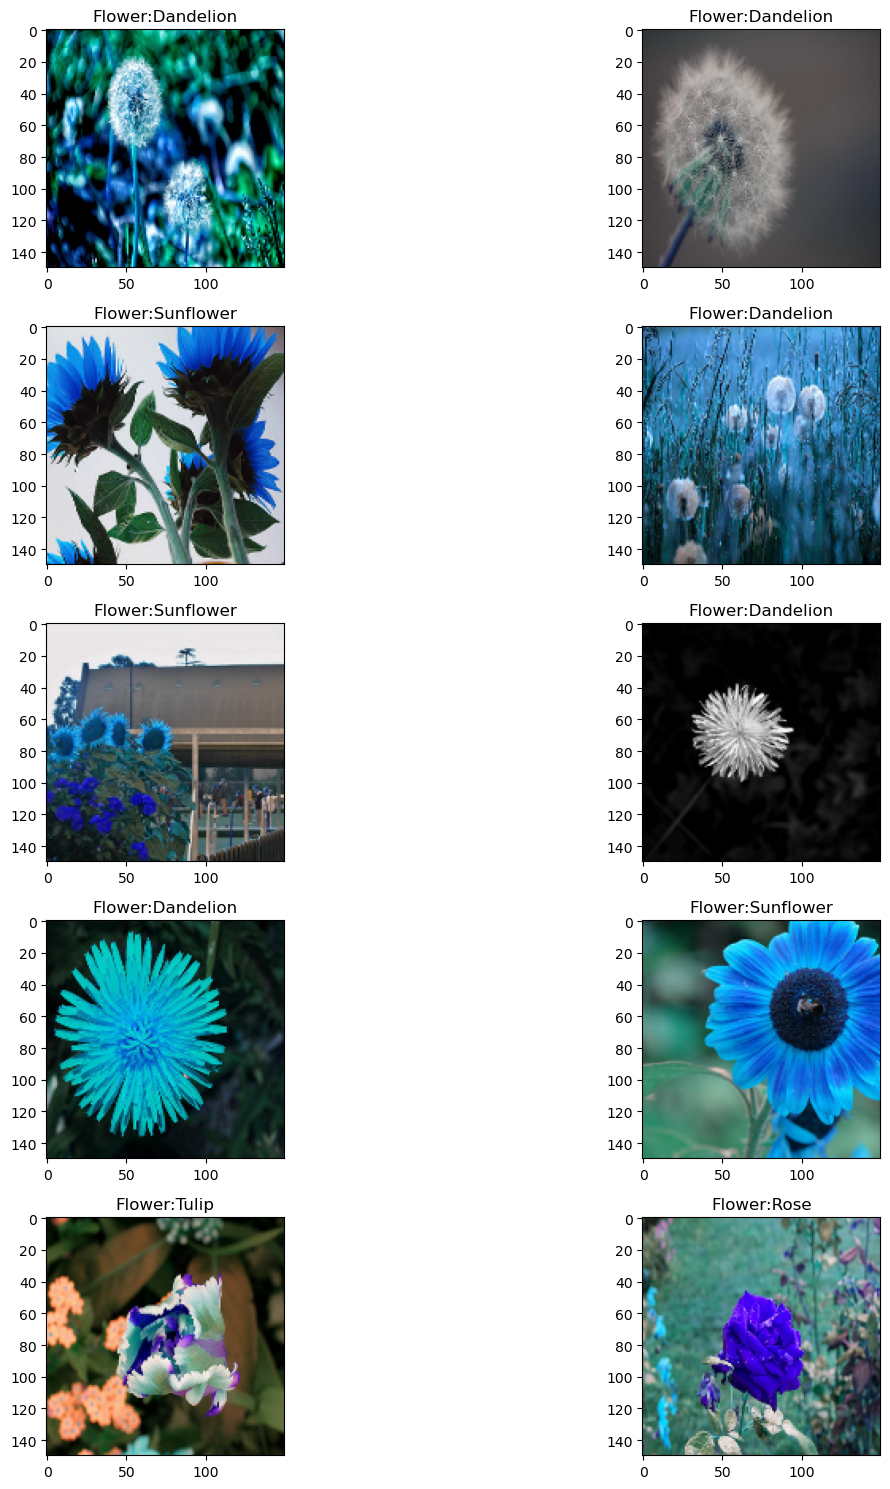

In [38]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)

for row in range(5):
    for col in range(2):
        l=rn.randint(0,len(Z))
        ax[row, col].imshow(X[l])
        ax[row, col].set_title("Flower:"+Z[l])
plt.tight_layout()

In [39]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
#X->contains all the image array
#y->contains all
print(X)

[[[[0.87843137 0.84705882 0.84313725]
   [0.8627451  0.83529412 0.81960784]
   [0.88627451 0.85098039 0.83921569]
   ...
   [0.05490196 0.03529412 0.03529412]
   [0.06666667 0.04313725 0.04705882]
   [0.04705882 0.02745098 0.03137255]]

  [[0.88235294 0.85098039 0.84705882]
   [0.90588235 0.8745098  0.86666667]
   [0.87843137 0.84705882 0.84313725]
   ...
   [0.05882353 0.04705882 0.05098039]
   [0.05098039 0.02745098 0.03529412]
   [0.04705882 0.03137255 0.02745098]]

  [[0.92156863 0.89019608 0.89019608]
   [0.90588235 0.8745098  0.8627451 ]
   [0.89803922 0.8745098  0.87058824]
   ...
   [0.0627451  0.05490196 0.05490196]
   [0.05098039 0.02745098 0.03529412]
   [0.03137255 0.01568627 0.01176471]]

  ...

  [[0.71372549 0.69019608 0.69411765]
   [0.7372549  0.71764706 0.72156863]
   [0.79215686 0.77647059 0.76078431]
   ...
   [0.54117647 0.60392157 0.62745098]
   [0.62352941 0.6627451  0.68235294]
   [0.65098039 0.6745098  0.71372549]]

  [[0.86666667 0.84705882 0.83137255]
   [0.8

In [40]:
print(Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [41]:
#spliting to test and train dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
print(Z)

['Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 